In [2]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-25T09:34:49.243Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9095}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10477, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

C:\Users\Toyin\AppData\Local\Temp\ipykernel_7152\82311038.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']= pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10477,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949537e+07,1.949537e+07,False,NaN,1,NaN,NaN,None,2023-09-25T09:33:00.000Z,26106.343108,1.094905e+10,70.5287,-0.071379,-1.835940,-2.479338,0.413741,-11.518713,-14.070571,5.089528e+11,48.8839,5.482332e+11,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:07.582263
1,1027,Ethereum,ETH,ethereum,7433,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202292e+08,1.202292e+08,True,NaN,2,NaN,NaN,None,2023-09-25T09:33:00.000Z,1576.316358,4.155937e+09,116.5618,-0.112166,-1.118675,-3.622267,-4.310186,-16.260017,-15.950203,1.895192e+11,18.2055,1.895192e+11,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:07.582263
2,825,Tether USDt,USDT,tether,62769,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.999827,1.702617e+10,59.4278,0.004324,-0.030951,-0.058864,0.035955,-0.020142,-0.040631,8.318937e+10,7.9913,8.641127e+10,None,2023-09-25T09:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-25 09:35:07.582263
3,1839,BNB,BNB,bnb,1636,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538473e+08,1.538473e+08,False,NaN,4,NaN,NaN,None,2023-09-25T09:33:00.000Z,209.015375,3.267794e+08,56.5755,-0.045686,-0.848844,-4.314428,-3.644979,-13.742120,-12.302319,3.215645e+10,3.0890,3.215645e+10,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:07.582263
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.494842,6.905209e+08,90.1815,-0.140547,-2.880661,0.132541,-5.081496,-30.964505,3.025818,2.634796e+10,2.5310,4.948416e+10,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:07.582263
5,3408,USDC,USDC,usd-coin,14224,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.571187e+10,2.571187e+10,False,NaN,6,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.999992,2.441192e+09,68.0094,-0.004870,-0.009074,-0.024309,-0.001869,-0.007941,-0.026921,2.571165e+10,2.4699,2.571165e+10,None,2023-09-25T09:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-25 09:35:07.582263
6,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511997e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.244705,9.480324e+07,49.3125,-0.176331,-0.451428,-2.060641,-5.521992,-21.802582,-13.016570,8.594042e+09,0.8256,1.101174e+10,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:07.582263
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411492e+11,1.411492e+11,True,NaN,8,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.060767,1.370478e+08,27.7499,-0.103311,-1.401834,-1.975779,-3.428255,-23.165949,-6.626688,8.577267e+09,0.8237,8.577267e+09,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:07.582263
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-hol

In [7]:
def api_runner():
    global df
     
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df


import os

file_path = r"C:\Users\Toyin\project works\Crypto Data Automation.csv"

if not os.path.isfile(file_path):
    # Create a new CSV file with headers if it doesn't exist
    df.to_csv(file_path, index=False)  # Remove index column
else:
    # Append data to the existing CSV file without headers
    df.to_csv(file_path, mode='a', header=False, index=False)

            

{'status': {'timestamp': '2023-09-25T09:35:18.201Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9095}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10477, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Toyin\AppData\Local\Temp\ipykernel_7152\1134288580.py:28: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']= pd.to_datetime('now')


In [33]:
import os
from time import time
from time import sleep

for i in range(3):
    api_runner()
print('API runner completed')
sleep(60)
exit()

API runner completed


In [8]:
import time
num_runs = 3
sleep_interval = 60
for i in range(num_runs):
    print(f'Running api_runner() - Iteration {i + 1}')
    api_runner()  

    time.sleep(sleep_interval)
print('API runner completed')


Running api_runner() - Iteration 1
Running api_runner() - Iteration 2
Running api_runner() - Iteration 3
API runner completed


In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10477,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949537e+07,1.949537e+07,False,NaN,1,NaN,NaN,None,2023-09-25T09:33:00.000Z,26106.343108,1.094905e+10,70.5287,-0.071379,-1.835940,-2.479338,0.413741,-11.518713,-14.070571,5.089528e+11,48.8839,5.482332e+11,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
1,1027,Ethereum,ETH,ethereum,7433,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202292e+08,1.202292e+08,True,NaN,2,NaN,NaN,None,2023-09-25T09:33:00.000Z,1576.316358,4.155937e+09,116.5618,-0.112166,-1.118675,-3.622267,-4.310186,-16.260017,-15.950203,1.895192e+11,18.2055,1.895192e+11,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
2,825,Tether USDt,USDT,tether,62769,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.999827,1.702617e+10,59.4278,0.004324,-0.030951,-0.058864,0.035955,-0.020142,-0.040631,8.318937e+10,7.9913,8.641127e+10,None,2023-09-25T09:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-25 09:35:09.499228
3,1839,BNB,BNB,bnb,1636,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538473e+08,1.538473e+08,False,NaN,4,NaN,NaN,None,2023-09-25T09:33:00.000Z,209.015375,3.267794e+08,56.5755,-0.045686,-0.848844,-4.314428,-3.644979,-13.742120,-12.302319,3.215645e+10,3.0890,3.215645e+10,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.494842,6.905209e+08,90.1815,-0.140547,-2.880661,0.132541,-5.081496,-30.964505,3.025818,2.634796e+10,2.5310,4.948416e+10,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
5,3408,USDC,USDC,usd-coin,14224,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.571187e+10,2.571187e+10,False,NaN,6,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.999992,2.441192e+09,68.0094,-0.004870,-0.009074,-0.024309,-0.001869,-0.007941,-0.026921,2.571165e+10,2.4699,2.571165e+10,None,2023-09-25T09:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-25 09:35:09.499228
6,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511997e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.244705,9.480324e+07,49.3125,-0.176331,-0.451428,-2.060641,-5.521992,-21.802582,-13.016570,8.594042e+09,0.8256,1.101174e+10,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411492e+11,1.411492e+11,True,NaN,8,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.060767,1.370478e+08,27.7499,-0.103311,-1.401834,-1.975779,-3.428255,-23.165949,-6.626688,8.577267e+09,0.8237,8.577267e+09,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-hol

In [10]:
pd.set_option('display.float_format',lambda x:'%.5f'% x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10477,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19495368.00000,19495368.00000,False,NaN,1,NaN,NaN,None,2023-09-25T09:33:00.000Z,26106.34311,10949046562.65270,70.52870,-0.07138,-1.83594,-2.47934,0.41374,-11.51871,-14.07057,508952766031.48322,48.88390,548233205275.28003,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
1,1027,Ethereum,ETH,ethereum,7433,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120229194.26476,120229194.26476,True,NaN,2,NaN,NaN,None,2023-09-25T09:33:00.000Z,1576.31636,4155936541.57545,116.56180,-0.11217,-1.11867,-3.62227,-4.31019,-16.26002,-15.95020,189519245609.45566,18.20550,189519245609.45999,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
2,825,Tether USDt,USDT,tether,62769,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83203741768.41058,86426198724.99622,True,NaN,3,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.99983,17026170842.12846,59.42780,0.00432,-0.03095,-0.05886,0.03595,-0.02014,-0.04063,83189372326.03009,7.99130,86411272758.25000,None,2023-09-25T09:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-25 09:35:09.499228
3,1839,BNB,BNB,bnb,1636,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847301.19328,153847301.19328,False,NaN,4,NaN,NaN,None,2023-09-25T09:33:00.000Z,209.01537,326779366.08989,56.57550,-0.04569,-0.84884,-4.31443,-3.64498,-13.74212,-12.30232,32156451294.04224,3.08900,32156451294.04000,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.49484,690520933.27066,90.18150,-0.14055,-2.88066,0.13254,-5.08150,-30.96450,3.02582,26347960647.18356,2.53100,49484161428.45000,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
5,3408,USDC,USDC,usd-coin,14224,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25711868798.02440,25711868798.02440,False,NaN,6,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.99999,2441191680.83345,68.00940,-0.00487,-0.00907,-0.02431,-0.00187,-0.00794,-0.02692,25711653758.94474,2.46990,25711653758.94000,None,2023-09-25T09:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-25 09:35:09.499228
6,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35119971480.54000,36198584811.42400,False,NaN,7,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.24471,94803235.28356,49.31250,-0.17633,-0.45143,-2.06064,-5.52199,-21.80258,-13.01657,8594041831.94932,0.82560,11011736802.01000,None,2023-09-25T09:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 09:35:09.499228
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141149246383.70517,141149246383.70517,True,NaN,8,NaN,NaN,None,2023-09-25T09:33:00.000Z,0.06077,137047793.36997,27.74990,-0.10331,-1.40183,-1.97578,-3.42826,-23.16595,-6.62669,8577267227.73587,0.82370,8577267227.74000,None,2023-09-2

In [12]:
df3=df.groupby('name',sort =False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07138,-1.83594,-2.47934,0.41374,-11.51871,-14.07057
Ethereum,-0.11217,-1.11867,-3.62227,-4.31019,-16.26002,-15.95020
Tether USDt,0.00432,-0.03095,-0.05886,0.03595,-0.02014,-0.04063
BNB,-0.04569,-0.84884,-4.31443,-3.64498,-13.74212,-12.30232
XRP,-0.14055,-2.88066,0.13254,-5.08150,-30.96450,3.02582
USDC,-0.00487,-0.00907,-0.02431,-0.00187,-0.00794,-0.02692
Cardano,-0.17633,-0.45143,-2.06064,-5.52199,-21.80258,-13.01657
Dogecoin,-0.10331,-1.40183,-1.97578,-3.42826,-23.16595,-6.62669
Solana,0.04590,-0.77863,1.50525,-4.07559,-23.34568,17.59246


In [13]:
df4 =df3.stack()

In [14]:
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.07138
             quote.USD.percent_change_24h    -1.83594
             quote.USD.percent_change_7d     -2.47934
             quote.USD.percent_change_30d     0.41374
             quote.USD.percent_change_60d   -11.51871
             quote.USD.percent_change_90d   -14.07057
Ethereum     quote.USD.percent_change_1h     -0.11217
             quote.USD.percent_change_24h    -1.11867
             quote.USD.percent_change_7d     -3.62227
             quote.USD.percent_change_30d    -4.31019
             quote.USD.percent_change_60d   -16.26002
             quote.USD.percent_change_90d   -15.95020
Tether USDt  quote.USD.percent_change_1h      0.00432
             quote.USD.percent_change_24h    -0.03095
             quote.USD.percent_change_7d     -0.05886
             quote.USD.percent_change_30d     0.03595
             quote.USD.percent_change_60d    -0.02014
             quote.USD.percent_change_90

In [15]:
type(df3)

pandas.core.frame.DataFrame

In [16]:
type(df4)

pandas.core.series.Series

In [17]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.07138
            quote.USD.percent_change_24h  -1.83594
            quote.USD.percent_change_7d   -2.47934
            quote.USD.percent_change_30d   0.41374
            quote.USD.percent_change_60d -11.51871
            quote.USD.percent_change_90d -14.07057
Ethereum    quote.USD.percent_change_1h   -0.11217
            quote.USD.percent_change_24h  -1.11867
            quote.USD.percent_change_7d   -3.62227
            quote.USD.percent_change_30d  -4.31019
            quote.USD.percent_change_60d -16.26002
            quote.USD.percent_change_90d -15.95020
Tether USDt quote.USD.percent_change_1h    0.00432
            quote.USD.percent_change_24h  -0.03095
            quote.USD.percent_change_7d   -0.05886
            quote.USD.percent_change_30d   0.03595
            quote.USD.percent_change_60d  -0.02014
            quote.USD.percent_change_90d  -0.04063
BNB         quote.USD.percent_change_1h   -0.04569
            quote.USD.percent_change_24h  -0.84884
            quote.USD.percent_change_7d   -4.31443
            quote.USD.percent_change_30d  -3.64498
            quote.USD.percent_change_60d -13.74212
            quote.USD.percent_change_90d -12.30232
XRP         quote.USD.percent_change_1h   -0.14055
            quote.USD.percent_change_24h  -2.88066
            quote.USD.percent_change_7d    0.13254
            quote.USD.percent_change_30d  -5.08150
            quote.USD.percent_change_60d -30.96450
            quote.USD.percent_change_90d   3.02582
USDC        quote.USD.percent_change_1h   -0.00487
            quote.USD.percent_change_24h  -0.00907
            quote.USD.percent_change_7d   -0.02431
            quote.USD.percent_change_30d  -0.00187
            quote.USD.percent_change_60d  -0.00794
            quote.USD.percent_change_90d  -0.02692
Cardano     quote.USD.percent_change_1h   -0.17633
            quote.USD.percent_change_24h  -0.45143
            quote.USD.percent_change_7d   -2.06064
            quote.USD.percent_change_30d  -5.52199
            quote.USD.percent_change_60d -21.80258
            quote.USD.percent_change_90d -13.01657
Dogecoin    quote.USD.percent_change_1h   -0.10331
            quote.USD.percent_change_24h  -1.40183
            quote.USD.percent_change_7d   -1.97578
            quote.USD.percent_change_30d  -3.42826
            quote.USD.percent_change_60d -23.16595
            quote.USD.percent_change_90d  -6.62669
Solana      quote.USD.percent_change_1h    0.04590
            quote.USD.percent_change_24h  -0.77863
            quote.USD.percent_change_7d    1.50525
            quote.USD.percent_change_30d  -4.07559
            quote.USD.percent_change_60d -23.34568
            quote.USD.percent_change_90d  17.59246
Toncoin     quote.USD.percent_change_1h    0.27756
            quote.USD.percent_change_24h  -3.04721
            quote.USD.percent_change_7d   -8.35097
            quote.USD.percent_change_30d  54.70643
            quote.USD.percent_change_60d  61.43908
            quote.USD.percent_change_90d  50.99096
TRON        quote.USD.percent_change_1h   -0.11551
            quote.USD.percent_change_24h   0.02092
            quote.USD.percent_change_7d   -0.01792
            quote.USD.percent_change_30d   8.57854
            quote.USD.percent_change_60d   1.61402
            quote.USD.percent_change_90d  12.61335
Dai         quote.USD.percent_change_1h   -0.01330
            quote.USD.percent_change_24h  -0.06263
            quote.USD.percent_change_7d   -0.06120
            quote.USD.percent_change_30d   0.01817
            quote.USD.percent_change_60d  -0.05759
            quote.USD.percent_change_90d  -0.01018
Polkadot    quote.USD.percent_change_1h   -0.50343
            quote.USD.percent_change_24h   0.04571
            quote.USD.percent_change_7d   -2.49287
            quote.USD.percent_change_30d -10.36098
            quote.USD.percent_change_60d -24.10702
            quo

In [18]:
df5.count()

values    90
dtype: int64

In [19]:
index =pd.Index(range(90))

df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07138
1,Bitcoin,quote.USD.percent_change_24h,-1.83594
2,Bitcoin,quote.USD.percent_change_7d,-2.47934
3,Bitcoin,quote.USD.percent_change_30d,0.41374
4,Bitcoin,quote.USD.percent_change_60d,-11.51871
5,Bitcoin,quote.USD.percent_change_90d,-14.07057
6,Ethereum,quote.USD.percent_change_1h,-0.11217
7,Ethereum,quote.USD.percent_change_24h,-1.11867
8,Ethereum,quote.USD.percent_change_7d,-3.62227
9,Ethereum,quote.USD.percent_change_30d,-4.31019


In [20]:

df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07138
1,Bitcoin,quote.USD.percent_change_24h,-1.83594
2,Bitcoin,quote.USD.percent_change_7d,-2.47934
3,Bitcoin,quote.USD.percent_change_30d,0.41374
4,Bitcoin,quote.USD.percent_change_60d,-11.51871
5,Bitcoin,quote.USD.percent_change_90d,-14.07057
6,Ethereum,quote.USD.percent_change_1h,-0.11217
7,Ethereum,quote.USD.percent_change_24h,-1.11867
8,Ethereum,quote.USD.percent_change_7d,-3.62227
9,Ethereum,quote.USD.percent_change_30d,-4.31019


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df7['percent_change'] =df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.07138
1,Bitcoin,24h,-1.83594
2,Bitcoin,7d,-2.47934
3,Bitcoin,30d,0.41374
4,Bitcoin,60d,-11.51871
5,Bitcoin,90d,-14.07057
6,Ethereum,1h,-0.11217
7,Ethereum,24h,-1.11867
8,Ethereum,7d,-3.62227
9,Ethereum,30d,-4.31019


<Figure size 1200x600 with 0 Axes>

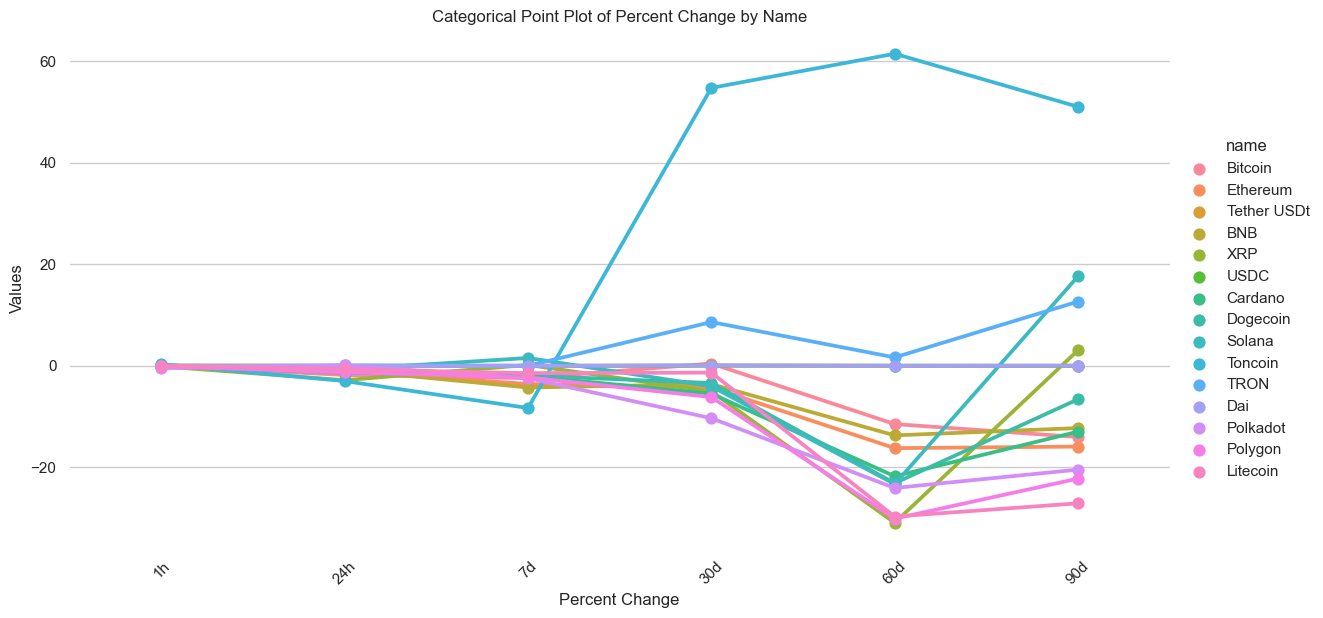

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')  
plt.figure(figsize=(12, 6))  


plot = sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point', height=6, aspect=2)

plot.set_axis_labels('Percent Change', 'Values')  
plot.set(title='Categorical Point Plot of Percent Change by Name') 
plot.despine(left=True, bottom=True)  
plt.xticks(rotation=45)
plt.show()


In [24]:
import pandas as pd

# Create a DataFrame with your cryptocurrency data
data = {
    'name': ['Bitcoin', 'Ethereum', 'Tether USDt', 'BNB', 'XRP', 'USD Coin', 'Dogecoin', 'Cardano', 'Solana', 'Toncoin', 'TRON', 'Dai', 'Polkadot', 'Polygon', 'Litecoin'],
    '1h': [-0.02449, -0.03808, 0.00385, -0.08959, -0.06933, 0.00400, -0.04157, -0.06405, -0.24431, -0.28900, -0.01924, 0.01237, -0.00434, 0.03904, 0.07734],
    '24h': [-0.35881, -0.40777, 0.00159, -0.24835, -0.37544, -0.00290, -0.13713, 0.03846, -1.08026, -0.11309, -0.56184, -0.00187, -0.12161, 0.12211, -0.05508],
    '7d': [0.06486, -2.86771, -0.01500, -1.57206, 1.96963, -0.00673, -1.08001, -1.93072, 1.86706, 4.92471, -0.14723, 0.02518, -3.46420, -1.03824, 0.32043],
    '30d': [1.77328, -3.37717, 0.05161, -3.31819, -1.26510, 0.01420, -1.84460, -6.81992, -8.95018, 64.15822, 9.04924, 0.21302, -8.94707, -4.11338, 0.61119],
    '60d': [-9.09768, -14.41592, 0.01381, -11.28459, -27.04671, -0.00297, -20.31032, -19.49379, -16.76715, 63.76001, 2.40772, 0.03273, -22.20299, -27.34579, -27.26508],
    '90d': [-13.21101, -15.74919, -0.01094, -11.75939, 3.92532, 0.02600, -8.08126, -16.41354, 14.20798, 57.96535, 14.19788, 0.03996, -22.22286, -21.76656, -26.24907]
}

df = pd.DataFrame(data)


df


,name,1h,24h,7d,30d,60d,90d
0,Bitcoin,-0.02449,-0.35881,0.06486,1.77328,-9.09768,-13.21101
1,Ethereum,-0.03808,-0.40777,-2.86771,-3.37717,-14.41592,-15.74919
2,Tether USDt,0.00385,0.00159,-0.01500,0.05161,0.01381,-0.01094
3,BNB,-0.08959,-0.24835,-1.57206,-3.31819,-11.28459,-11.75939
4,XRP,-0.06933,-0.37544,1.96963,-1.26510,-27.04671,3.92532
5,USD Coin,0.00400,-0.00290,-0.00673,0.01420,-0.00297,0.02600
6,Dogecoin,-0.04157,-0.13713,-1.08001,-1.84460,-20.31032,-8.08126
7,Cardano,-0.06405,0.03846,-1.93072,-6.81992,-19.49379,-16.41354
8,Solana,-0.24431,-1.08026,1.86706,-8.95018,-16.76715,14.20798
9,Toncoin,-0.28900,-0.11309,4.92471,64.15822,63.76001,57.96535


This line chart provides a valuable overview of how selected cryptocurrencies have performed over different time intervals and can help stakeholders in the cryptocurrency market gain insights into market dynamics and potential investment opportunities.

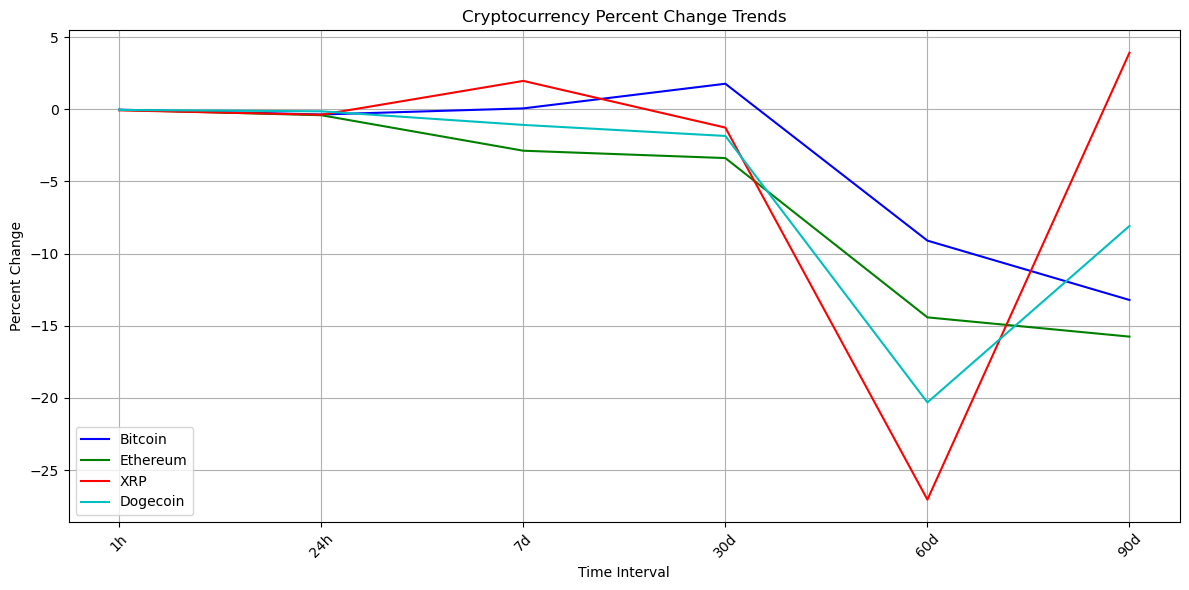

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
cryptos_to_plot = ['Bitcoin', 'Ethereum', 'XRP', 'Dogecoin']
colors = ['b', 'g', 'r', 'c']

# Loop through selected cryptocurrencies and plot their percent change trends
for i, crypto in enumerate(cryptos_to_plot):
    ax.plot(df.columns[1:], df[df['name'] == crypto].iloc[0, 1:], label=crypto, color=colors[i])


ax.set_xlabel('Time Interval')
ax.set_ylabel('Percent Change')
ax.set_title('Cryptocurrency Percent Change Trends')
ax.legend()


plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
